[[156 164 156 ... 164 156 132]
 [164 164 164 ... 172 156 124]
 [164 156 164 ... 164 156 132]
 ...
 [ 44  44  52 ... 108 100 100]
 [ 44  44  60 ... 100 108 108]
 [ 44  44  52 ... 108 100 108]]
123
2.2204460492503128e-16
-44.899611971379954
255.0
0.0


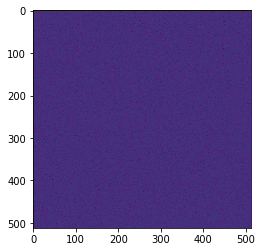

In [3]:
#Problem 5
from PIL import Image
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
from matplotlib import pylab as pt
import matplotlib.image as ig 
m=512;
n=512;
s= -100;

img = np.fromfile('lena.bin',dtype='uint8',count=-1)
img = img.reshape(m,n)
print(img)
input()
fourier = fft2(img)    # FFT of Original Image


#For Shift Image by -100
def modn(x, M):
    if (0<=x<M):
        return x
    else:
        x = ((x%M)+M)%M
        return x
    
    
imgShift = np.zeros((m,n),dtype='uint8')
for k in range(m):
    for l in range(n):
        imgShift[k][l] =  img[modn(k+s,m)][modn(l+s,n)]


#FFT Of Shifted Image:

FFT_Shift_img = fft2(imgShift)    #FFT of shifted Image by 80 

# Divsion of FFT of Shifted image and FFT Of original Image
Complex_Image = np.divide(FFT_Shift_img, fourier) 

#Complex_Image = fftshift(np.log(abs(Complex_Image)))

# Take Inverse FFT Of complex divison(i.e FFT_Shift_img/fourier)
IFFT_Image  = np.log(abs(ifft2(Complex_Image)))
#pt.imshow(IFFT_Image)
Ifft_max = np.amax(IFFT_Image)
print(Ifft_max)
Ifft_min = np.amin(IFFT_Image)
print(Ifft_min)

new_val = np.round((IFFT_Image-Ifft_min)/(Ifft_max-Ifft_min)*255)

print(np.amax(new_val))
print(np.amin(new_val))
pt.imshow(new_val)
ig.imsave('image.jpg', new_val)


In [5]:
print(new_val[412][412])
print(new_val[100][100])
PILimage = Image.fromarray(img)
PILimage.save('result.jpg')

27.0
255.0


In [7]:
import matplotlib.image as img 
with open('lena.bin',mode='rb') as f:
    d = np.fromfile(f, dtype=np.uint8).reshape(512,512)

PILimage = Image.fromarray(d)
PILimage.save('lena.jpg')
m = img.imread("lena.jpg");
print(m)
input()

print("---------------")
print(d)

[[159 162 164 ... 163 162 130]
 [161 163 164 ... 168 162 128]
 [163 164 163 ... 168 158 123]
 ...
 [ 42  46  51 ... 103 103 103]
 [ 46  51  57 ... 104 106 108]
 [ 39  47  55 ... 101 103 106]]
123456
---------------
[[156 164 156 ... 164 156 132]
 [164 164 164 ... 172 156 124]
 [164 156 164 ... 164 156 132]
 ...
 [ 44  44  52 ... 108 100 100]
 [ 44  44  60 ... 100 108 108]
 [ 44  44  52 ... 108 100 108]]
